In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [17]:
url = "C:\\Users\\admin\\Desktop\\dataset\\bank-additional\\bank-additional.csv"
df = pd.read_csv(url, sep=';')
print(df.head())

   age          job  marital          education default  housing     loan  \
0   30  blue-collar  married           basic.9y      no      yes       no   
1   39     services   single        high.school      no       no       no   
2   25     services  married        high.school      no      yes       no   
3   38     services  married           basic.9y      no  unknown  unknown   
4   47       admin.  married  university.degree      no      yes       no   

     contact month day_of_week  ...  campaign  pdays  previous     poutcome  \
0   cellular   may         fri  ...         2    999         0  nonexistent   
1  telephone   may         fri  ...         4    999         0  nonexistent   
2  telephone   jun         wed  ...         1    999         0  nonexistent   
3  telephone   jun         fri  ...         3    999         0  nonexistent   
4   cellular   nov         mon  ...         1    999         0  nonexistent   

  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.e

In [34]:
print("\nChecking for missing values:")
print(df.isnull().sum())


Checking for missing values:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [52]:
label_encoder = LabelEncoder()
df['y'] = label_encoder.fit_transform(df['y'])  


categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    if col != 'y':  
        df[col] = label_encoder.fit_transform(df[col])

print("\nTransformed dataset (first few rows):")
print(df.head())



Transformed dataset (first few rows):
   age  job  marital  education  default  housing  loan  contact  month  \
0   30    1        1          2        0        2     0        0      6   
1   39    7        2          3        0        0     0        1      6   
2   25    7        1          3        0        2     0        1      4   
3   38    7        1          2        0        1     1        1      4   
4   47    0        1          6        0        2     0        0      7   

   day_of_week  ...  campaign  pdays  previous  poutcome  emp.var.rate  \
0            0  ...         2    999         0         1          -1.8   
1            0  ...         4    999         0         1           1.1   
2            4  ...         1    999         0         1           1.4   
3            0  ...         3    999         0         1           1.4   
4            1  ...         1    999         0         1          -0.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  y  
0  

In [54]:
X = df.drop('y', axis=1)
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")


Training set size: (3295, 20)
Test set size: (824, 20)


In [56]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [74]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy*100:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)


Accuracy: 87.1359

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.93       732
           1       0.43      0.47      0.45        92

    accuracy                           0.87       824
   macro avg       0.68      0.69      0.69       824
weighted avg       0.88      0.87      0.87       824


Confusion Matrix:
[[675  57]
 [ 49  43]]


In [70]:
clf_simplified=DecisionTreeClassifier(random_state=42,max_depth=3)
clf_simplified.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

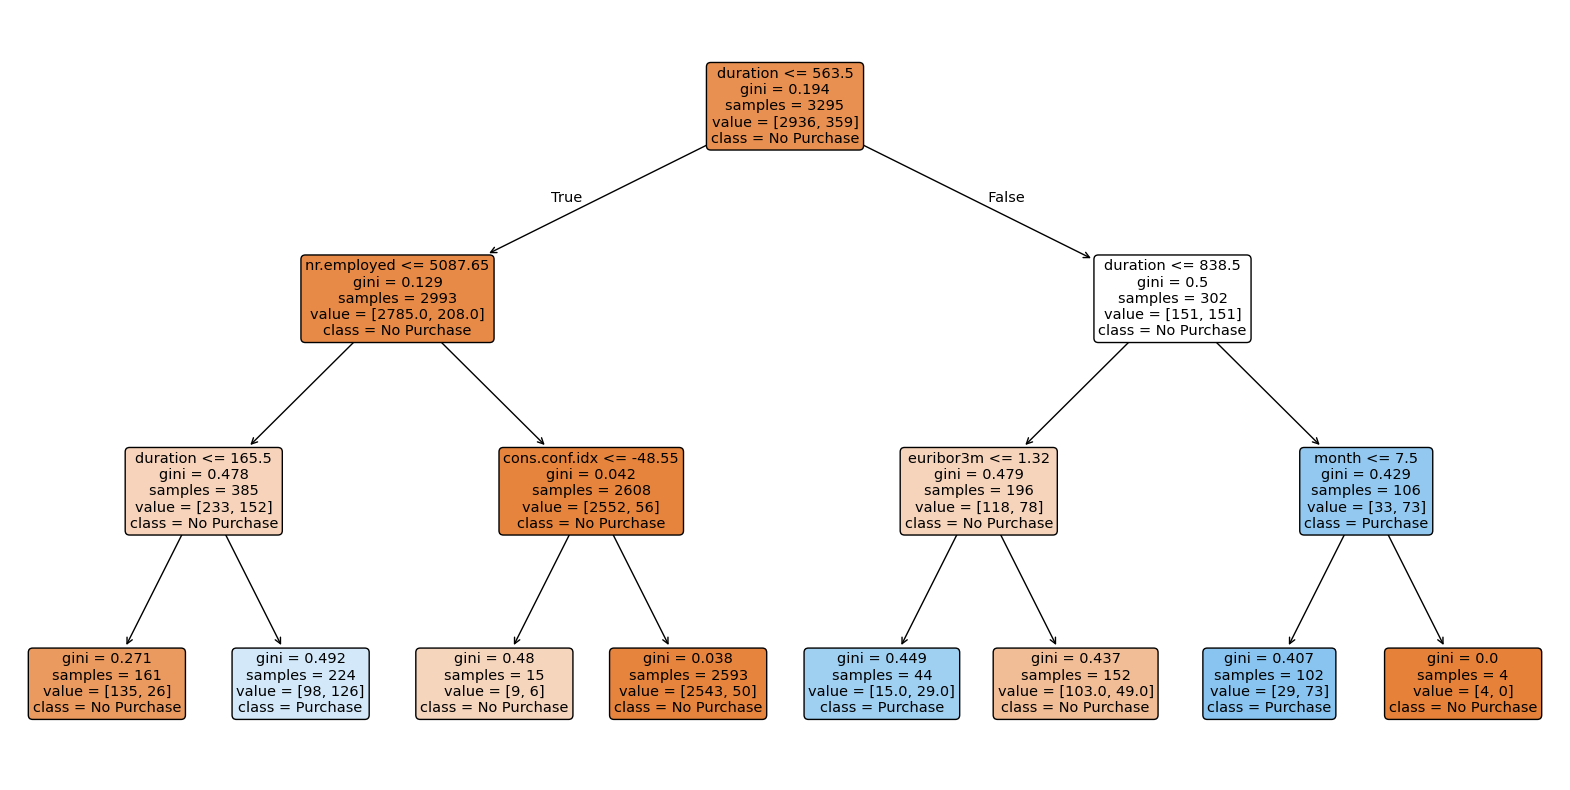

In [72]:
plt.figure(figsize=(20, 10))
plot_tree(clf_simplified, filled=True, feature_names=X.columns, class_names=['No Purchase', 'Purchase'], rounded=True)
plt.show()